# Esercitazione su Metodi Monte Carlo

## Esercizio 1 - Diffusione 2D simmetrica

1. Produrre un modulo python che definisca una procedura di Random Walk in due dimensioni con le seguenti caratteristiche:
    * la diffusione ha un passo costante di lunghezza $s$;
    * ad ogni passo lo spostamento può andare con uguale probabilità in ogni direzione (probabilità costante per $\varphi \in [0,2\pi[$ ) con:
        * $\Delta x = s \cos \varphi$;
        * $\Delta y = s \sin \varphi$;
    * Il modulo deve mettere a disposizione una funzione che, data la lunghezza del passo $s$ e il numero di passi $N$, restituisca due array con rispettivamente lo spostamento lungo l'asse $X$ e l'asse $Y$ per ognuno degli $N$ passi.  

2. Definire uno script python che importi il modulo precedentemente definito per:
    1. produrre un grafico 2D delle posizioni di 5 random walker per 1000 passi;
        * SUGGERIMENTO: utilizzare una lista di array o un array 2D;
    2. produrre un grafico 2D della posizione di 100 random walker dopo 10, 100 e 1000 passi;
    3. prdurre ung grafico con due pannelli che mosti:
        * nel primo pannello lo stesso grafico del punto A;
        * nel secondo pannello il quadrato della distanza dal punto di partenza in funzione dei passi per gli stessi 5 random walker. 

## Esercizio 2 - Diffusione 2D asimmetrica


1. In uno script seaparato generare una distribuzione random di $\varphi$ tale che  $p(\varphi) = \frac{1}{4} \sin{\frac{\varphi}{2}}$.
    * SUGGERIMENTO: utilizzare il metodo della cumulatva;
    * SUGGERIMENTO: controllare che il risultato sia corretto attraverso un istogramma dei valori di $\varphi$ generati (`plt.hist`).
2. Modificare il modulo python per la diffusione 2D aggiungendo una funzione analoga a quella precedente ma con probabilità per $\varphi$ non uniforme:
    * $p(\varphi) = \frac{1}{4} \sin{\frac{\varphi}{2}}$.    
3. Modificare lo script python in modo tale che, attraverso la funzione per la diffusione asimmetrica appena definita, produca:  
    * un grafico 2D delle posizioni di 5 random walker per 1000 passi.

### Indizi su calcolo cumulativa

$$
p(\varphi) = \frac{1}{4} \sin{\frac{\varphi}{2}}, \varphi \in [0,2\pi]
$$


$$
C(\varphi) = \int_0^{\varphi} p(\varphi') d\varphi' \in [0,1]
$$

Per generazione numeri random: 
$$
\varphi = C^{-1}(s), s \in [0,1] 
$$
con $s$ uniformemente distribuita nell'intervallo $[0,1]$.




#### Passaggi per utilizzare il metodo della cumulativa
1. calcolare analiticamente la funzione cumulativa $C(\varphi)$;
2. calcolare analiticamente la funzione inversa della cumulativa $C^{-1}(s)$;
3. definire una funzione python corrispondente a $C^{-1}(s)$;
4. applicando la funzione appena definita a valori random uniformemente distribuiti nell'intervallo $[0,1]$, si ottengono valori nell'intervallo $[0, 2\pi]$ con la distribuzione di probabilità voluta: $p(\varphi)$.




## Esercizio 2a - Diffusione 2D asimmetrica 

1. Modificare il modulo python per la diffusione 2D aggiungendo una funzione analoga a quella simmetrica ma aggiungendo as ogni passo un contributo costante e positivo $s_f$ lungo l'asse $X$:
    1. invece di stabilire a priori il numero di passi, arrestare il processo quando la coordinata $X$ supera un valore prestabilito (~$s \times 200$).
2. Modificare lo script python in modo tale che, attraverso la funzione per la diffusione asimmetrica appena definita, produca un grafico 2D delle posizioni di 5 walker per:
    1.  $s_f = 0.1 \; s$
    2.  $s_f = 0.01 \; s$



## Esercizio 3 - Andamento Random Walk  2D


Una particella carica di alta energia che attraversa un materiale può ionizzare alcuni degli atomi che incontra lungo il tragitto, lascaindo una scia di ioni ed elettroni liberi.

Se il materiale è immerso in un campo elettrico, cariche positive e negative tendono a  migrare in direzioni opposte senza ricombinarsi, creando così una corrente elettrica potenzialmente rivelabile. 

  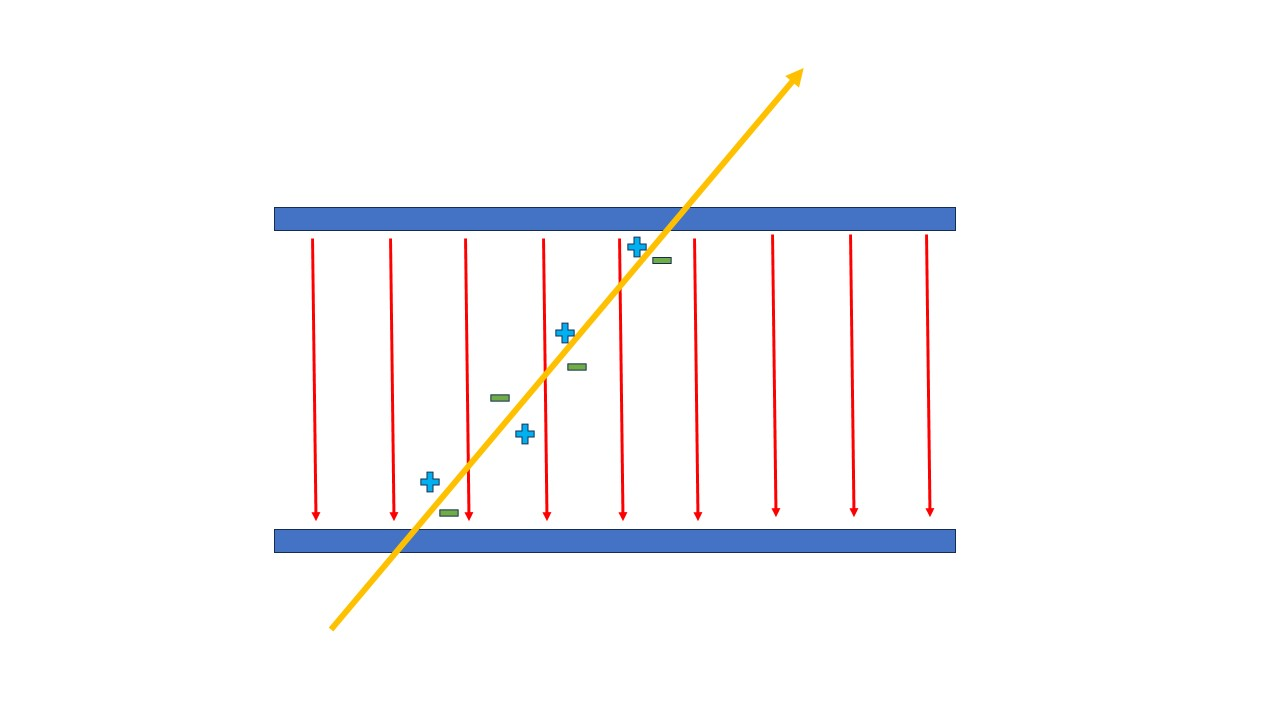

Per questo esercizio prenderemo un rivelatore a gas usato per tracciare le particelle cariche come le Multiwire Proportional Chambers (MWPC) di cui  la  figura di seguito mostra le linee del campo elettrico. 

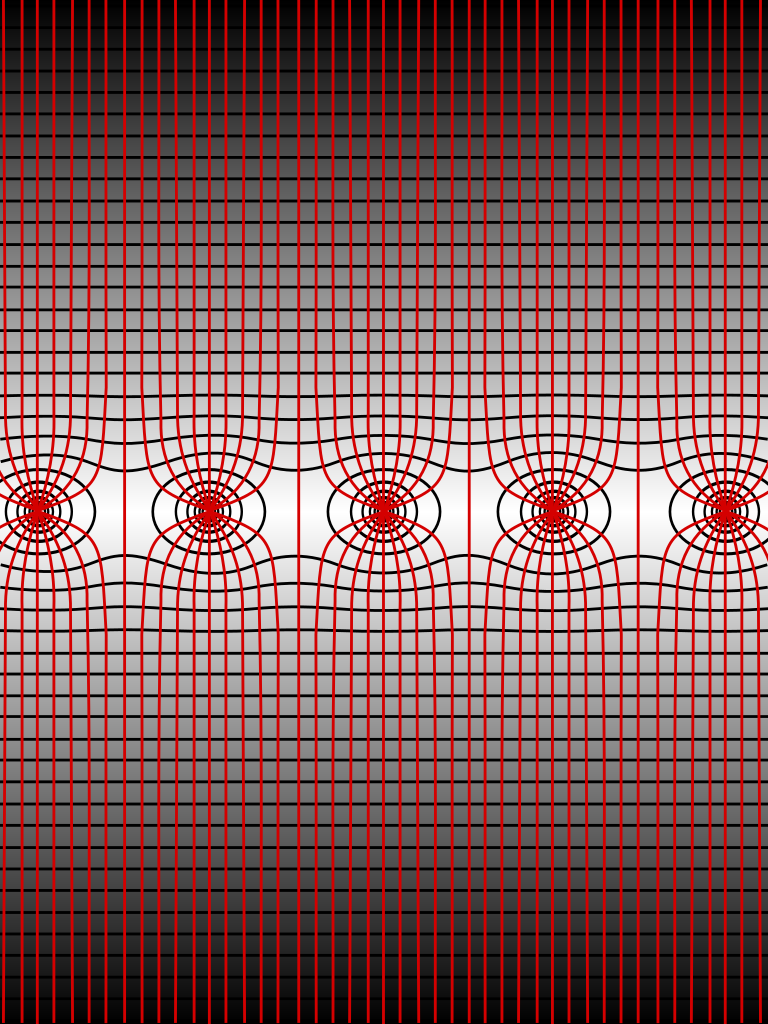

### Descrizione Fenomeno

1. Una particella carica attraversa una MWPC rilasciando _n_ coppie ione elettrone;
    1.  il valore di _n_ è soggetto a fluttuazioni poissoniane tra evento ed evento;
2. Le cariche iniziano a diffondersi grazie all'agitazione termica del gas;
3. Gli elettroni vengono spinti dal campo elettrico verso i fili;
4. In prossimità dei fili il campo elettrico è così intenso che gli elettroni guadagnao abbastnza energia fra un urto e il successivo per ionizzare altri atomi, generando una reazione di moltiplicazione di carica;
5. La migrazione degli ioni generati dalla moltiplicazione in prossimità dei fili viene rivelata sotto forma di segnale elettrico;
6. Nelle condizioni di operazione delle MWPC il segnale rivelato è proporzionale al numero di coppie elettrone ione iniziale _n_.

### Descrizione Geometria MWPC

Per questo esercizio:
1. La camera contenete il gas ha uno spessore di 1 cm;
2. I fili sono equidistanti dalle pareti dela camera;
3. Il campo elettrico fra una parete e i fili può essere considerato uniforme;
    1. Il campo è sempre diretto dai fili verso le pareti;
    2. Si può assumere che lo spessore dell'area di camera attorno ai fili in cui il campo elettrico non è uniforme sia trascurabile.

### Richieste

Produrre una classe python che: 
1. implementi la descrizione della geometria della camera MWPC definendone:
    1. lo spessore della camera;
    2. il numero medio di coppie elettrone ione generato dal passaggio di una particella ($n_p$);
2. implementi la simulazione del passaggio di una particella carica secondo le seguenti specifiche:
    1. il numero di coppie elettrone ione primarie deve fluttuare secondo la statistica di Poisson;
    2. la posizione delle coppie elettrone ione create deve essere distrubuita con probabilità uniforme lungo lo spessore;
3. impementi la simulazione della diffusione degli elettroni:
    1. con una componente spazialmente uniforme di passo $s_u$;
    2. con una componente aggiuntiva di passo $s_f$ sempre rivolta verso il filo per simulare l'effetto del campo elettrico;
    3. tenendo traccia dello spostamento nella direzione trasversale al piano dei fili e del corrispondnete numero di passi;
    4. arrestando il processo di deriva quando:
        1. la distanza dell'elettrone dal filo lungo la componente del campo è inferiore a 0.1 mm, considerando l'elettrone come rivelato con successo e quindi capace di generare segnale in uscita;
        2. l'elettrone si può ricombinare ed essere riassorbito; ad ogni passo va calcolato se l'elettrone viene assorbito assegnandogli una probabilità di assorbimento pari a $1/n_{r}$;
    6. per ogni elettrone che raggiunge il filo, assumendo un tempo medio $t_c$ fra due urti durante la diffusione, calcolare il tempo di deriva $t_d$ sulla base del numero di passi;

Produrre una classe python che descriva un evento della camera MWPC con le seguenti informazioni:
1. numero di coppie elettrone ione generate;
2. numero di cariche rivelate;
3. tempi di deriva per ogni elettrone rivelato;
4. posizione iniziale (nella dimensione trasversa al piano dei fili) degli elettroni.

Implementare un script python che utilizzi le classi sopra descritte per:
1. simulare un numero congruo di particelle che attraversano la camera;
2. mostrare le seguenti  distribuzioni:
    1. cariche rivelate;
    2. tempo di deriva degli elettroni;
    3. tempo minimo di deriva per evento;
    4. tempo medio di deriva per evento;
3. calcolare l'efficienza di rivelazione di un elettrone generato dal passaggio di una particella carica;
4. calcolare l'efficienza di rivelazione di una particella;

OPZIONALE: varaire i parametri geometrici o di deriva ed osservarne l'effetto sulle prestazioni della MWPC.

#### AVVERTENZA

Il tempo di calcolo per traccia potrebbe essere potenzilamente elevato: si consiglia di iniziare ad effettuare i test con un numero molto ridotto.

#### Parametri di prova 1
- $n_p$ = 5;
- $s_u$ = $10^{-5}$ cm
- $s_f$ = $10^{-7}$ cm
- $n_{r}$ = $10^{7}$
- $t_c$ = $10^{-12}$ s

#### Parametri di prova 2
- $n_p$ = 5;
- $s_u$ = $10^{-4}$ cm
- $s_f$ = $5\times10^{-5}$ cm
- $n_{r}$ = $10^{4}$
- $t_c$ = $10^{-12}$ s

#### Barra di Avanzamento

Può essere utile utilizzare una barra di avanzamento attraverso il modulo `tqdm`, eventualmente da istallare.



In [1]:
# Importo modulo tqdm
from tqdm import tqdm


# modulo time necessario per utilizzare sleep
import time

In [2]:
# Esempio uso tqdm

for i in tqdm(range(1000)):
   time.sleep(0.005) 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.56it/s]
